In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### NO NULL VALUES

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287709,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704399,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


####
1. 50% of ZN is 0.
2. 75% of CHAS is 0.
3. RAD has less than 50% in 

## Ways to check for NULL Values

#### 1. USE HEATMAP (SEABORN)

In [6]:
import seaborn as sns

<AxesSubplot:>

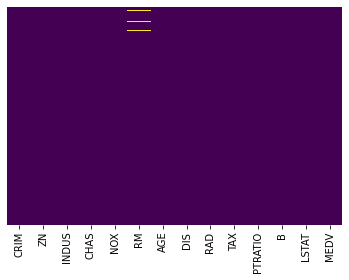

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.shape

(506, 14)

### 2. Create an array of all columns with NULL values

In [9]:
cols=np.array(df.columns)

In [10]:
nullCols=[col for col in cols if df[col].isnull().any()]

In [11]:
df['RM'].isnull().any()

True

In [12]:
nullCols

['RM']

As only RM has NULL values, that too very few, we can impute values.


In [13]:
df.isnull().sum()/len(df) * 100

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.790514
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

In [14]:
(df['RM'].isnull().sum()/len(df))*100

0.7905138339920948

In [15]:
4/506

0.007905138339920948

In [16]:
ls=[row for row in df['RM'].values if row==0]

In [17]:
ls

[]

In [18]:
df['RM'].values


array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012,   nan, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096,   nan, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 ,   nan, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
         nan, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [19]:
df['RM'].mean()

6.287709163346613

In [20]:
df['CHAS'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

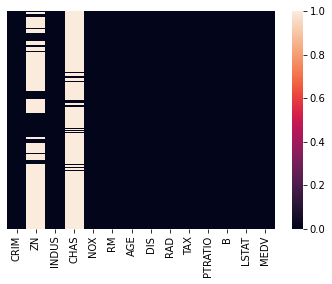

In [21]:
## check for zero values
sns.heatmap(df.eq(0), yticklabels=False)  

## Correlation Matrix

In [22]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Tejaswini Gurram\AppData\Local\Temp\ipykernel_14444\3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.32,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.40,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.31,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.32,-0.40,0.09,-0.31,1.00,-0.24,0.21,-0.21,-0.29,-0.35,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


1. CRIM rate and Distance from Radial highways shows positive corr of 63%
2. The price of house(MEDV) is positively influenced by RM values(Number of rooms)->70% 
3. The price of house(MEDV) is negatively influenced by LSTAT(% of Lower status population) values ->73% 

In [23]:
df.corr()['MEDV'].sort_values(ascending=True,axis=0,inplace=False)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695076
MEDV       1.000000
Name: MEDV, dtype: float64

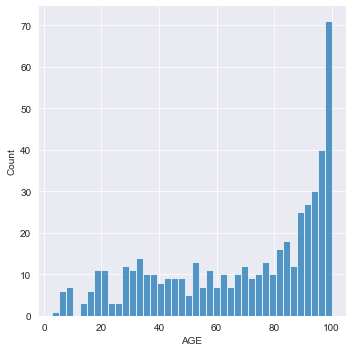

In [24]:
sns.set_style('darkgrid')
sns.displot(df['AGE'],kde=False,bins=40)

AGE=proportion of owner-occupied units built prior to 1940
This is skewed with most values lying in the 100 and above range.

In [25]:
df['AGE'].eq(100).sum()

43

In [26]:
43/500

0.086

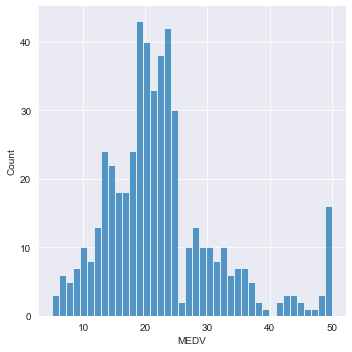

In [27]:
sns.displot(df['MEDV'],kde=False,bins=40)

MEDV mostly lie in 15-25, Normally distributed.

In [28]:
list(df['MEDV'].sort_values(ascending=True, axis=0))

[5.0,
 5.0,
 5.6,
 6.3,
 7.0,
 7.0,
 7.2,
 7.2,
 7.2,
 7.4,
 7.5,
 8.1,
 8.3,
 8.3,
 8.4,
 8.4,
 8.5,
 8.5,
 8.7,
 8.8,
 8.8,
 9.5,
 9.6,
 9.7,
 10.2,
 10.2,
 10.2,
 10.4,
 10.4,
 10.5,
 10.5,
 10.8,
 10.9,
 10.9,
 11.0,
 11.3,
 11.5,
 11.7,
 11.7,
 11.8,
 11.8,
 11.9,
 11.9,
 12.0,
 12.1,
 12.3,
 12.5,
 12.6,
 12.7,
 12.7,
 12.7,
 12.8,
 13.0,
 13.1,
 13.1,
 13.1,
 13.1,
 13.2,
 13.3,
 13.3,
 13.3,
 13.4,
 13.4,
 13.4,
 13.4,
 13.5,
 13.5,
 13.6,
 13.6,
 13.8,
 13.8,
 13.8,
 13.8,
 13.8,
 13.9,
 13.9,
 14.0,
 14.1,
 14.1,
 14.1,
 14.2,
 14.3,
 14.3,
 14.4,
 14.4,
 14.5,
 14.5,
 14.5,
 14.6,
 14.6,
 14.8,
 14.9,
 14.9,
 14.9,
 15.0,
 15.0,
 15.0,
 15.1,
 15.2,
 15.2,
 15.2,
 15.3,
 15.4,
 15.4,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.7,
 16.0,
 16.1,
 16.1,
 16.1,
 16.2,
 16.2,
 16.3,
 16.4,
 16.5,
 16.5,
 16.6,
 16.6,
 16.7,
 16.7,
 16.8,
 16.8,
 17.0,
 17.1,
 17.1,
 17.1,
 17.2,
 17.2,
 17.2,
 17.3,
 17.4,
 17.4,
 17.4,
 17.5,
 17.5,
 17.5,
 17.6,
 17.7,
 17.8,
 17.8,
 17.8,
 17.8,
 1

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [30]:
df_imputed['RM'][7]

6.287709163346613

In [31]:
imputer.statistics_.shape

(14,)

In [32]:
df_imputed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [33]:
#df_imputed.hist(bins=50, figsize=(20,30))

## Checking for distribution type

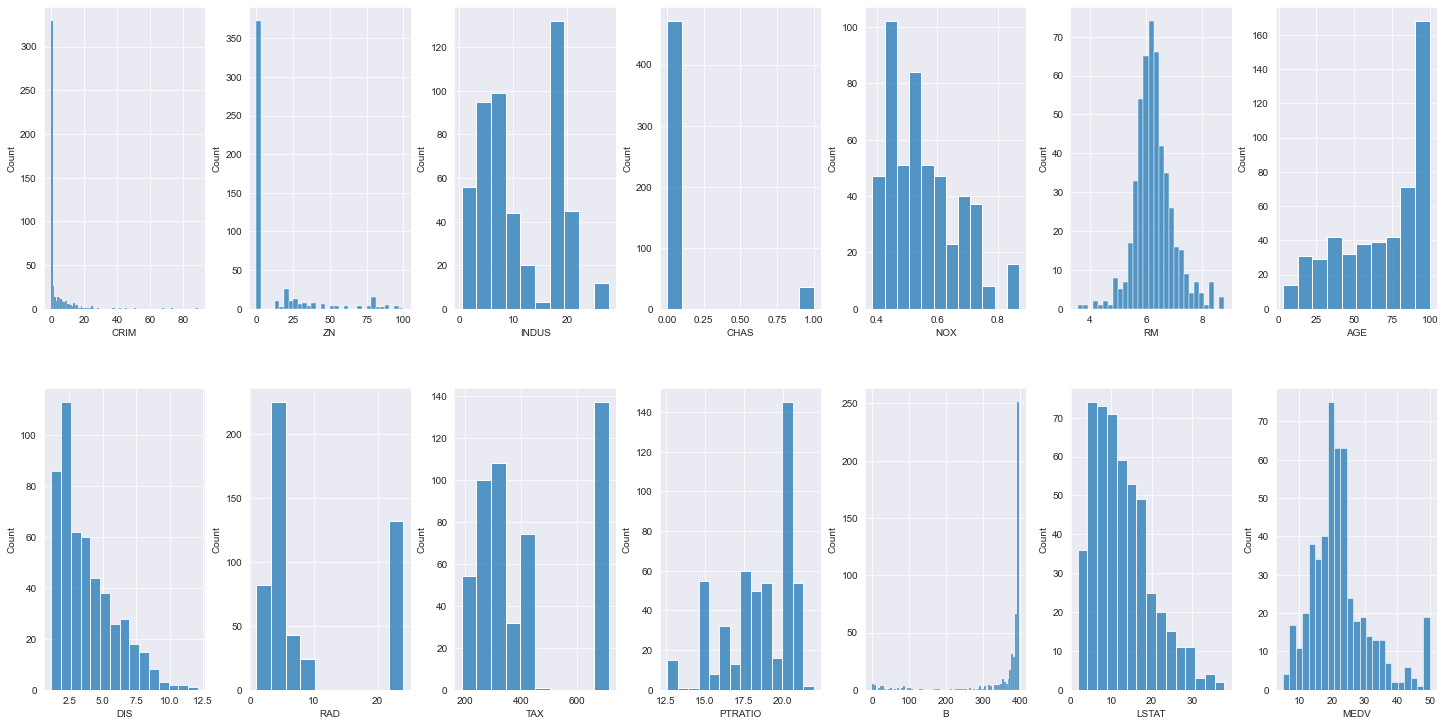

In [34]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_imputed.items():
    sns.histplot(v, ax=axs[index],kde=False)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations
1. You can observe Normal Distribution in MEDV
2. CRIM, ZN, AGE and B are highly skewed.

## OUTLIERS DETECTION

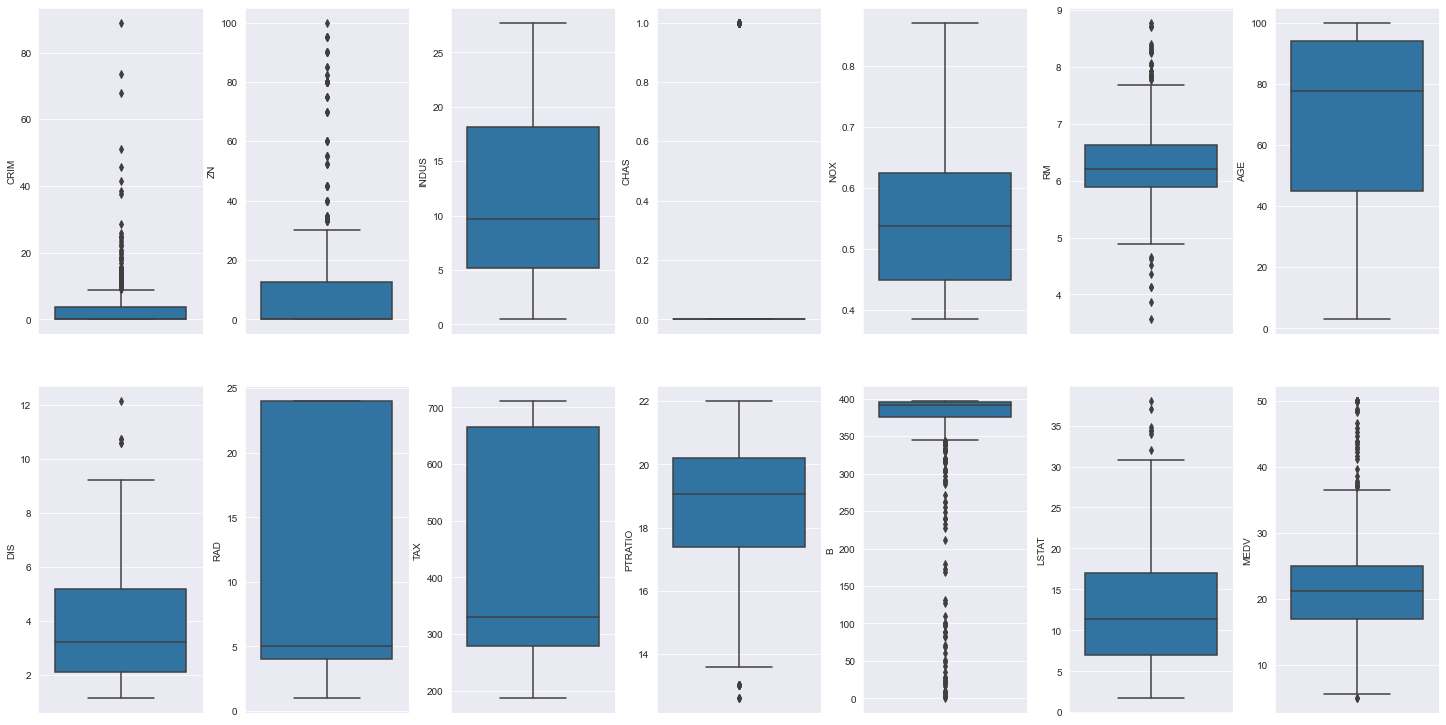

In [35]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_imputed.items():
    sns.boxplot(y=k, data=df_imputed, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations
1. CRIM, ZN, B, RM and MEDV has outliers

## Scaling the data using StandardScaler

In [36]:
## Scaling the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
df_final=pd.DataFrame(std_scaler.fit_transform(df_imputed),columns=df_imputed.columns)

In [37]:
#Creating a pipeline
from sklearn.pipeline import Pipeline
df_pipeline=Pipeline([('numpy',SimpleImputer(strategy='mean')),('std_scaler',StandardScaler())])
pipelined_df=df_pipeline.fit_transform(df) #this is an array
pipelined_df

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [38]:
df_final

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.409882,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.190168,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.280179,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.013383,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.225964,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.435563,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.239273,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.981996,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.722333,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


## UNIVARIATE, BIVARIATE AND MULTIVARIATE ANALYSIS

In [39]:
## Scatter Plots
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT','TAX','NOX','PTRATIO']
#scatter_matrix(df_final[attributes],figsize=(20,20),alpha=0.8)
#df_final.plot(kind='scatter',x='RM',y='MEDV')

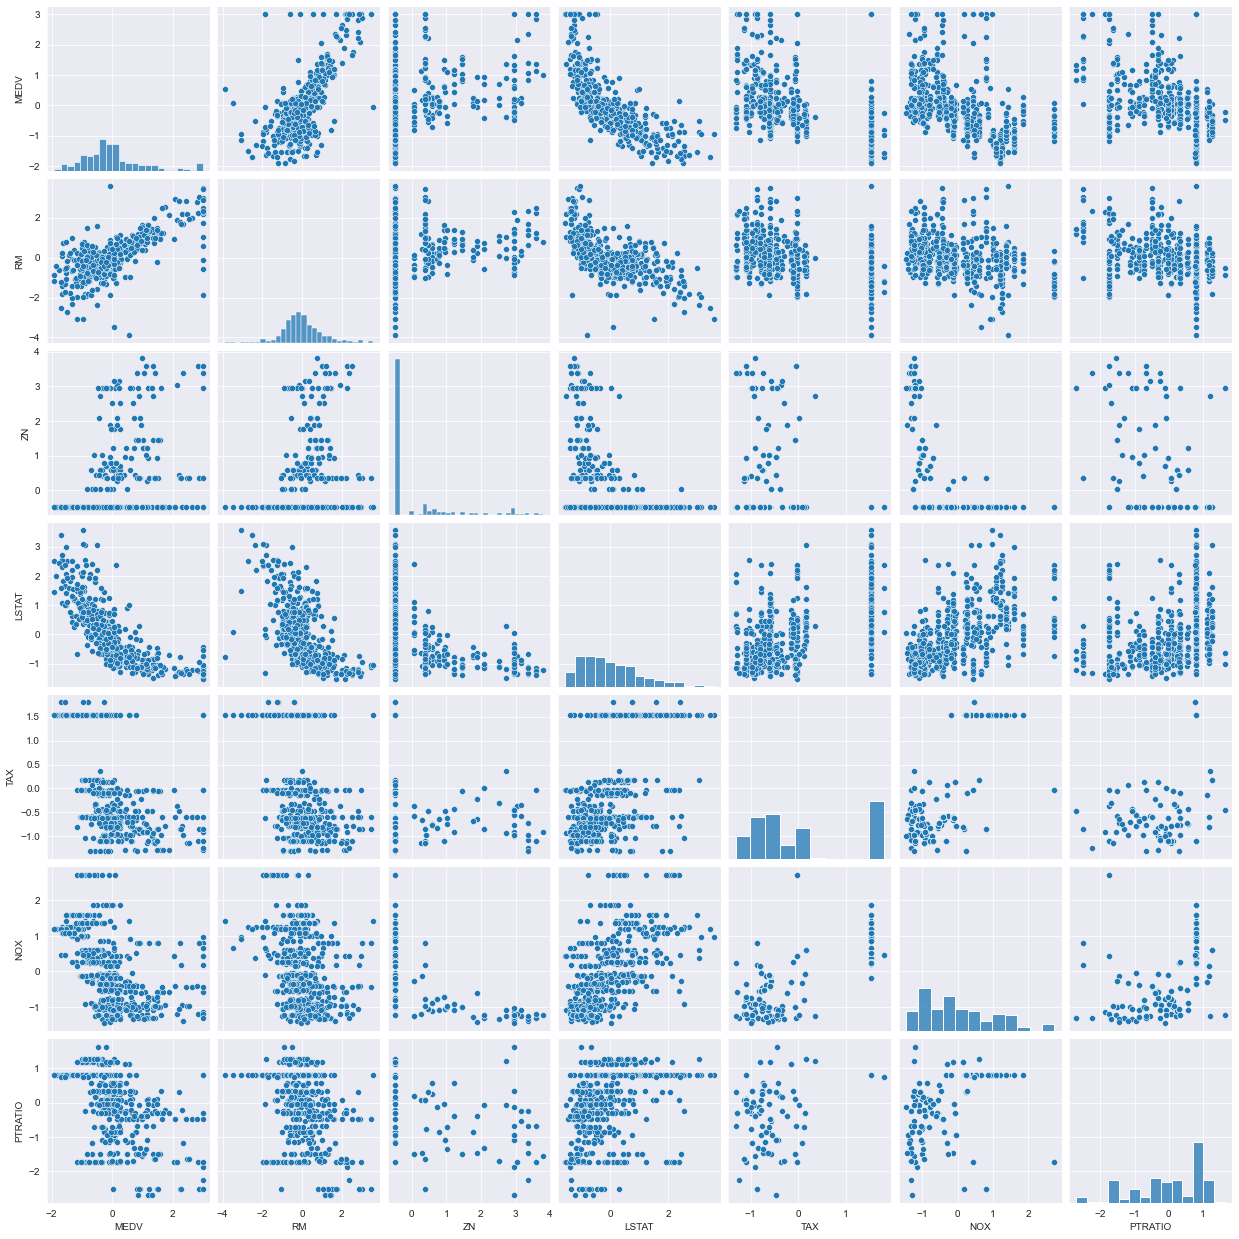

In [40]:
sns.pairplot(df_final[attributes])

Observations
1. Couldn't draw any new ones, same as the corr matrix ones.

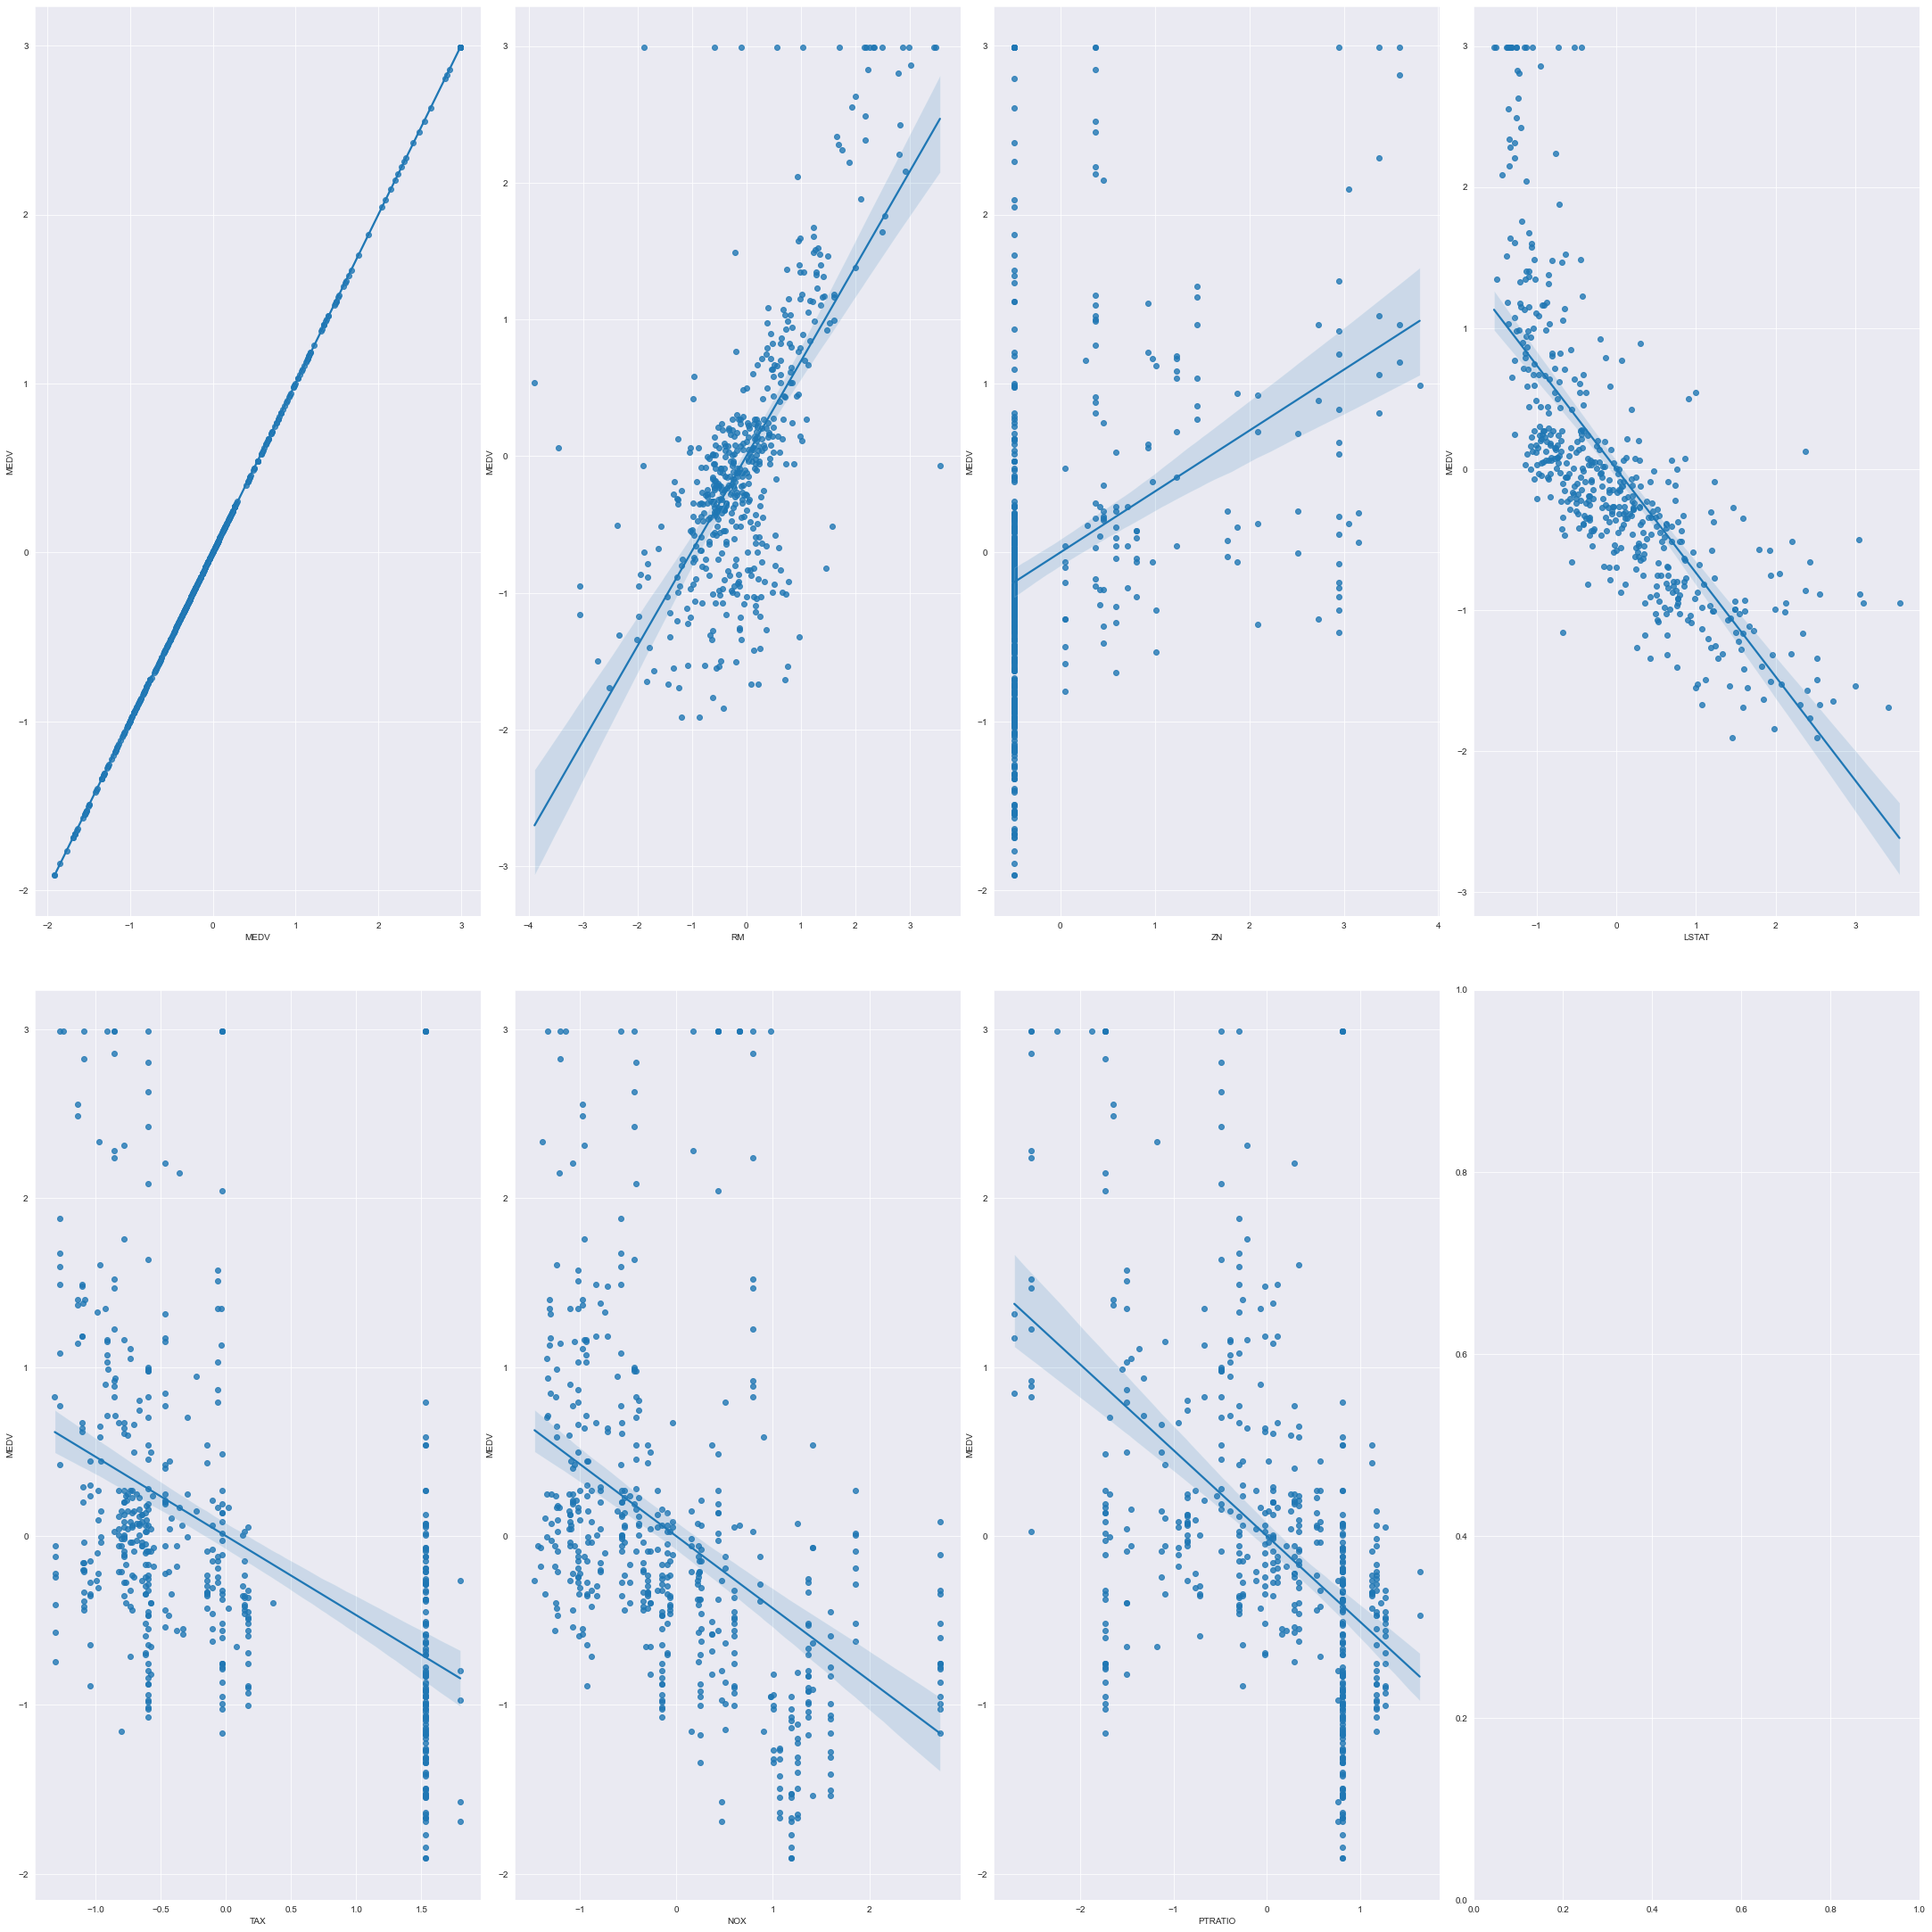

In [41]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(30, 30))
index = 0

y = df_final['MEDV']
axs = axs.flatten()
for i, k in enumerate(attributes):
    sns.regplot(y=y, x=df_final[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


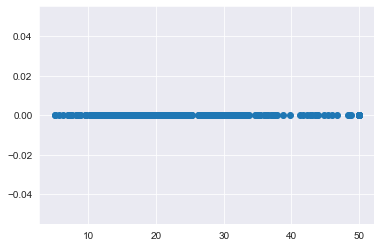

In [42]:
plt.plot(df['MEDV'],np.zeros_like(df['MEDV']),'o')

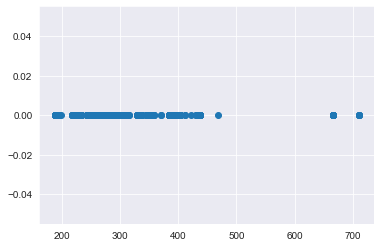

In [43]:
plt.plot(df['TAX'],np.zeros_like(df['TAX']),'o')

## Train-Test Splitting

In [44]:
##STRATIFIED ON BASIS OF CHAS(CATEGORICAL VARIABLE)
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_final, df_final['CHAS']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [51]:
housing=strat_train_set.drop('MEDV',axis=1) #cleaned, stratified and split
housing_labels=strat_train_set['MEDV'].copy()
strat_train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,-0.414909,2.945843,-1.093850,-0.272599,-1.405414,-0.256394,-1.300624,2.579000,-0.982843,-0.553762,-0.950402,0.397085,-0.852686,-0.068873
348,-0.418771,2.945843,-1.331682,-0.272599,-1.033965,0.495485,-1.382414,2.162434,-0.637962,-0.761637,-0.672984,0.375704,-0.933987,0.214104
476,0.146384,-0.487722,1.015999,-0.272599,0.512296,0.280051,0.889907,-0.708178,1.661245,1.530926,0.806576,0.433487,0.844819,-0.634828
321,-0.399385,-0.487722,-0.548149,-0.272599,-0.532942,0.125966,-0.507624,0.354320,-0.523001,-0.720062,0.529158,0.441052,-0.810634,0.061732
326,-0.385202,-0.487722,-0.548149,-0.272599,-0.532942,0.034656,-1.410862,0.770506,-0.523001,-0.720062,0.529158,0.441052,-0.911559,0.050848


## Model Training

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

model_lin=LinearRegression()
model_dtr=DecisionTreeRegressor()
model_rtr=RandomForestRegressor()
model_lin.fit(housing,housing_labels)
model_dtr.fit(housing,housing_labels)
model_rtr.fit(housing,housing_labels)

RandomForestRegressor()

In [69]:
data=housing[:5]
data_labels=housing_labels[:5]
#prep_data=df_pipeline.transform(data)

model_lin.predict(data)

array([ 0.15405832,  0.5089125 , -0.21208895,  0.26974276,  0.13124054])

In [70]:
model_dtr.predict(data)

array([-0.06887304,  0.2141044 , -0.63482793,  0.06173193,  0.05084818])

In [71]:
model_rtr.predict(data)

array([-0.00672684,  0.33208422, -0.70252484,  0.0889413 ,  0.11734788])

In [73]:
np.array(data_labels)

array([-0.06887304,  0.2141044 , -0.63482793,  0.06173193,  0.05084818])

In [76]:
housing_predictions_lin=model_lin.predict(housing)
housing_predictions_rtr=model_rtr.predict(housing)
housing_predictions_dtr=model_dtr.predict(housing)

mse_lin=mean_squared_error(housing_labels, housing_predictions_lin)
rmse_lin=np.sqrt(mse_lin)
mse_rtr=mean_squared_error(housing_labels, housing_predictions_rtr)
rmse_rtr=np.sqrt(mse_rtr)
mse_dtr=mean_squared_error(housing_labels, housing_predictions_dtr)
rmse_dtr=np.sqrt(mse_dtr)


rmse_scores = {'LinearReg': [], 'RandomForest': [], 'Decis':[]}
rmse_scores['LinearReg'].append(rmse_lin)
rmse_scores['RandomForest'].append(rmse_rtr)
rmse_scores['Decis'].append(rmse_dtr)

In [80]:
pd.DataFrame(rmse_scores)

,LinearReg,RandomForest,Decis
0,0.525743,0.130373,0.0


In [81]:
## Decision tree overfits